<div class="alert alert-block alert-success">

#  BA Carriers Ratings In CentralDispatch
    
</div>

*ცენტალ დისპეჩის რეიტინგის მიხედვით - თუ დაწერილია 5 ვარსკლავი და არ აქვს "canceled load" ჩათვლილია პოზიტივად, თუარადა ნეგატივად.*

In [100]:
import pandas as pd
import seaborn as  sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [101]:
df = pd.read_excel("Dispech.xlsx","all_ratings").rename(columns = {'DATE': 'Date'})

In [102]:
df["Date"]= pd.to_datetime(df["Date"],dayfirst =True)
df['Month'] = df.Date.astype('datetime64[M]')
df['Month_n'] = df.Date.dt.month
df['Positive'] = df.Status.apply(lambda x : 1 if x == 'Positive'  else 0)
df['Negative'] = df.Status.apply(lambda x : 1 if x == 'Negative'  else 0)

In [103]:
df_status_count = df.Status.value_counts().to_frame().reset_index()

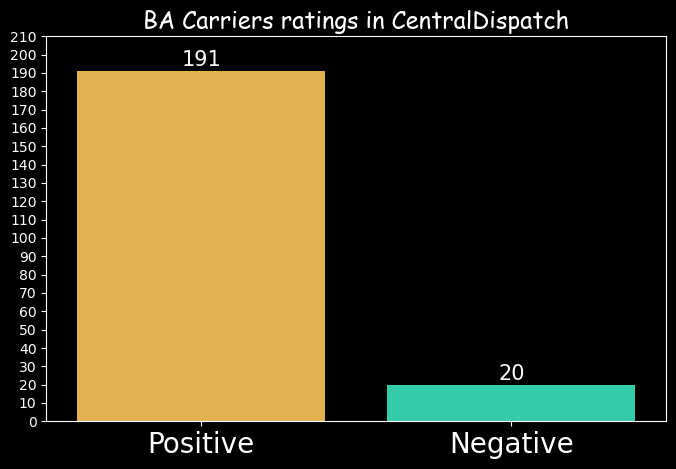

In [104]:
plt.figure(figsize=(8,5))
color = ['navy','darkred']
plots = sns.barplot(x = df_status_count["index"], y = df_status_count["Status"],palette="turbo_r")

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='top',
                   size= 15, xytext=(0, 15),color = "snow",
                   textcoords='offset points')
    
plt.tick_params(axis='x', rotation=90)
plt.title("BA Carriers ratings in CentralDispatch",fontdict={'fontsize': 17,'fontname' :'Comic Sans MS'})

plt.yticks(np.arange(0,215,10))
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(rotation = 0,size = 20);

#  მიღებული რეიტინგების რაოდენობა  თვის ჭრილში

In [105]:
df_month = df.groupby("Month",as_index=False)\
        .agg({"Positive":"sum","Negative":"sum"})\
        .reset_index(drop=True)

df_month["Total"] = df_month['Positive'] + df_month['Negative']
df_month.append(df_month.sum(numeric_only= True).rename("Total"))

,Month,Positive,Negative,Total
0,2023-02-01,5.0,0.0,5.0
1,2023-03-01,37.0,0.0,37.0
2,2023-04-01,13.0,1.0,14.0
3,2023-05-01,21.0,0.0,21.0
4,2023-06-01,25.0,1.0,26.0
5,2023-07-01,43.0,9.0,52.0
6,2023-08-01,47.0,9.0,56.0
Total,NaT,191.0,20.0,211.0


In [106]:
df_month = df_month[["Month","Positive","Negative"]]

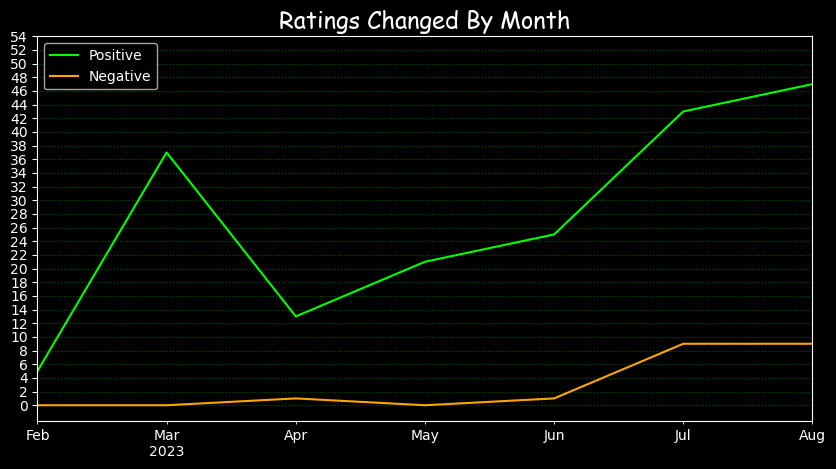

In [107]:
df_month.plot(kind = 'line',x = 'Month',color = ["lime","orange"],figsize=(10,5))
plt.title("Ratings Changed By Month",fontdict={'fontsize': 17, 'fontname':'Comic Sans MS'})
plt.grid(linestyle= ":",alpha = 0.7,color = 'g')
plt.xlabel(None)
plt.xticks(size = 15)
plt.yticks(np.arange(0,55,2));

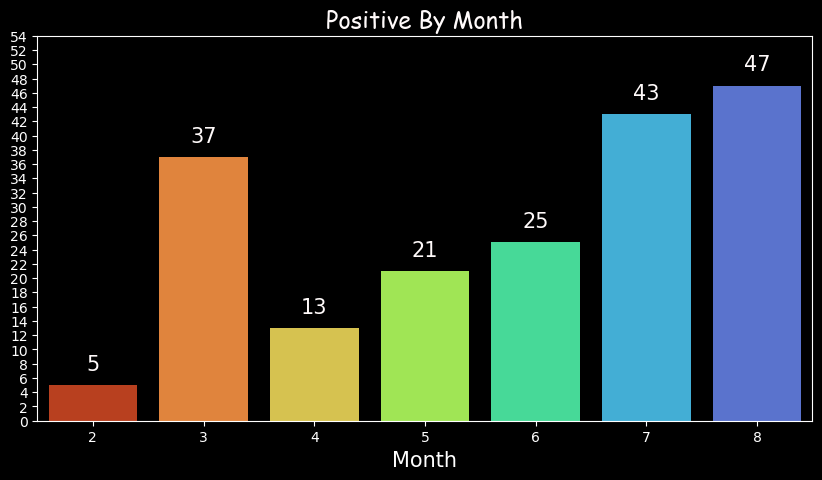

In [108]:
df_month_p = df.groupby('Month_n',as_index=False).agg({"Positive":"sum","Negative":"sum"})
plt.figure(figsize=(10,5))
plots = sns.barplot(x='Month_n', y='Positive',data = df_month_p, palette='turbo_r' )


plt.title("Positive By Month",
          fontdict={'fontsize': 17, 'fontname' : 'Comic Sans MS', "color": "snow"}) 

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size= 15, xytext=(0, 15),color = "snow",
                   textcoords='offset points')
plt.ylabel(None)    
plt.yticks(np.arange(0,55,2))
plt.xlabel("Month",size = 15)
plt.show()

# მიღებული რეიტინგების რაოდენობა კვირის ჭრილში

In [109]:
df_week = df.groupby(pd.Grouper(key="Date",freq = "W"))\
        .agg({"Positive":"sum","Negative":"sum"}).reset_index()


df_week.query('Date >= "2023-06-01"')

,Date,Positive,Negative
15,2023-06-04,9,0
16,2023-06-11,7,0
17,2023-06-18,4,0
18,2023-06-25,4,0
19,2023-07-02,7,1
20,2023-07-09,4,1
21,2023-07-16,9,2
22,2023-07-23,16,5
23,2023-07-30,11,1
24,2023-08-06,3,0


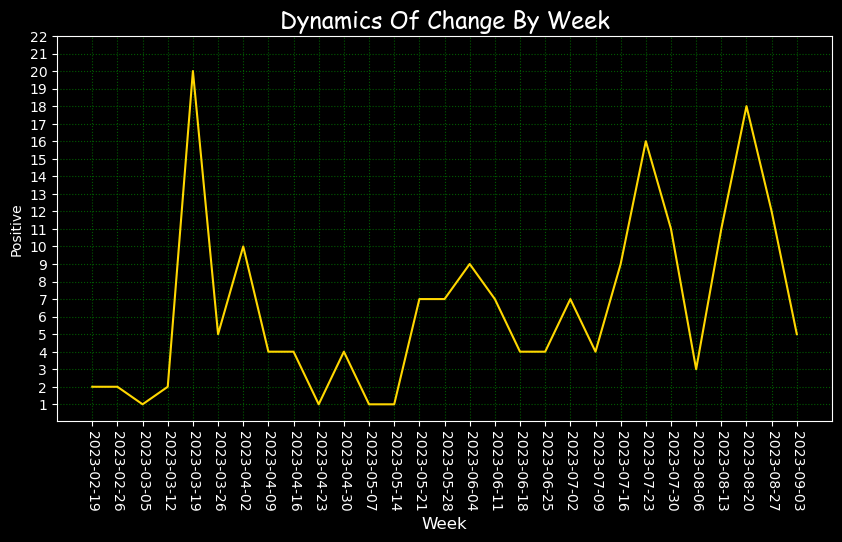

In [110]:
plt.figure(figsize=(10, 5))
sns.lineplot(x ='Date', y ='Positive',data = df_week , color = "gold")
plt.xticks(rotation = -90)
plt.xticks(df_week.Date)
plt.title("Dynamics Of Change By Week",fontdict={'fontsize': 17, 'fontname' : 'Comic Sans MS'}) 
plt.xlabel(None)
plt.grid(linestyle= ":", alpha = 0.7, color = 'g')
plt.yticks(np.arange(1,23))
plt.xlabel("Week",size = 12);

In [111]:
df_week['week_n'] = df_week.Date.dt.isocalendar().week

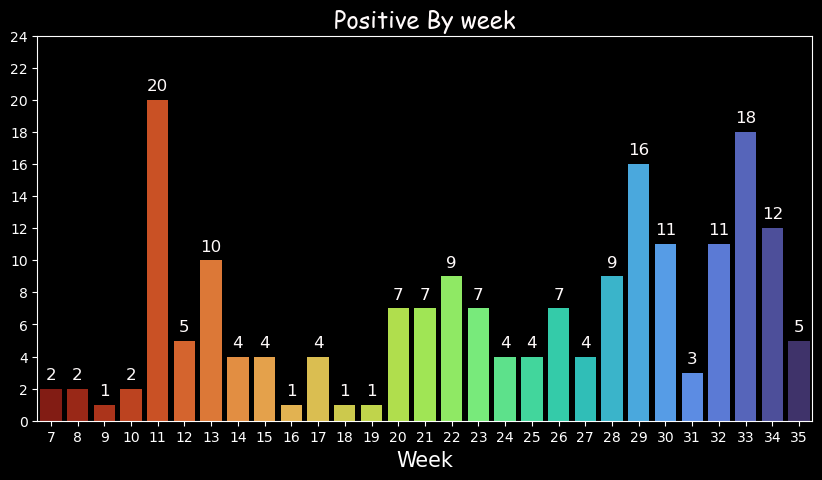

In [112]:
plt.figure(figsize=(10,5))
plots = sns.barplot(x='week_n', y='Positive',data = df_week, palette='turbo_r' )

plt.title("Positive By week",
          fontdict={'fontsize': 17, 'fontname' : 'Comic Sans MS', "color": "snow"}) 

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size= 12, xytext=(0, 10),color = "snow",
                   textcoords='offset points')
plt.ylabel(None)    
plt.yticks(np.arange(0,25,2))
plt.xlabel("Week",size = 15)
plt.show()

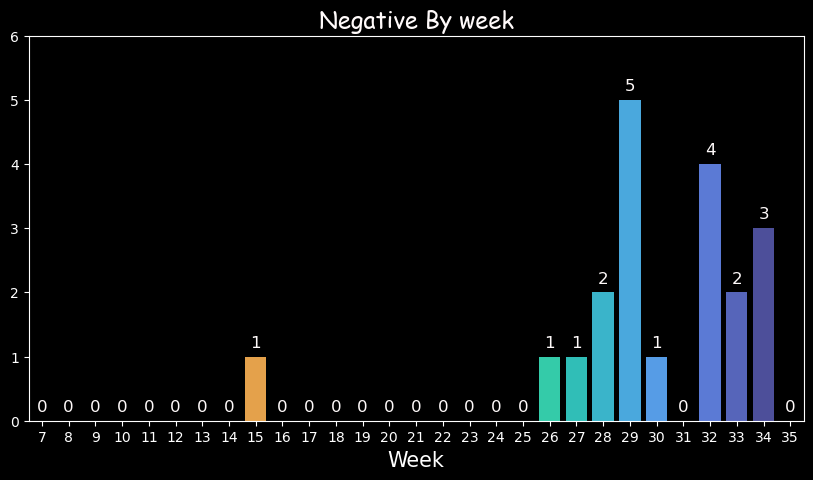

In [113]:
plt.figure(figsize=(10,5))
plots = sns.barplot(x='week_n', y='Negative',data = df_week, palette='turbo_r' )


plt.title("Negative By week",
          fontdict={'fontsize': 17, 'fontname' : 'Comic Sans MS', "color": "snow"}) 

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size= 12, xytext=(0, 10),color = "snow",
                   textcoords='offset points')
plt.ylabel(None)    
plt.yticks(np.arange(0,7))
plt.xlabel("Week",size = 15)
plt.show()

#  კომპანიების მიხედვით

*რამდენიმე კომპანია განსაკუთრებით აქტიურია პოზიტივებსაც წერს და ნეგატივიც აქვს*

In [114]:
df_company = df.groupby("Company")\
    .agg({"Positive":"sum","Negative":"sum"})\
    .sort_values("Positive",ascending=False)\
    .reset_index()

df_company.head(26)

,Company,Positive,Negative
0,Marvel Auto Transport LLC,5,1
1,Infinite Routes Auto,5,0
2,"Mercury Auto Transport, Inc.1",4,1
3,United Freeway Transportation LLC,4,0
4,MOVEAUTO,3,0
5,Xpress Auto Logistics Inc,3,0
6,WhipFlip Inc,3,1
7,AutoStar Transport Express LLC,2,0
8,BROADWAY AUTO TRANSPORT LLC,2,0
9,OW Auto Transport LLC,2,0


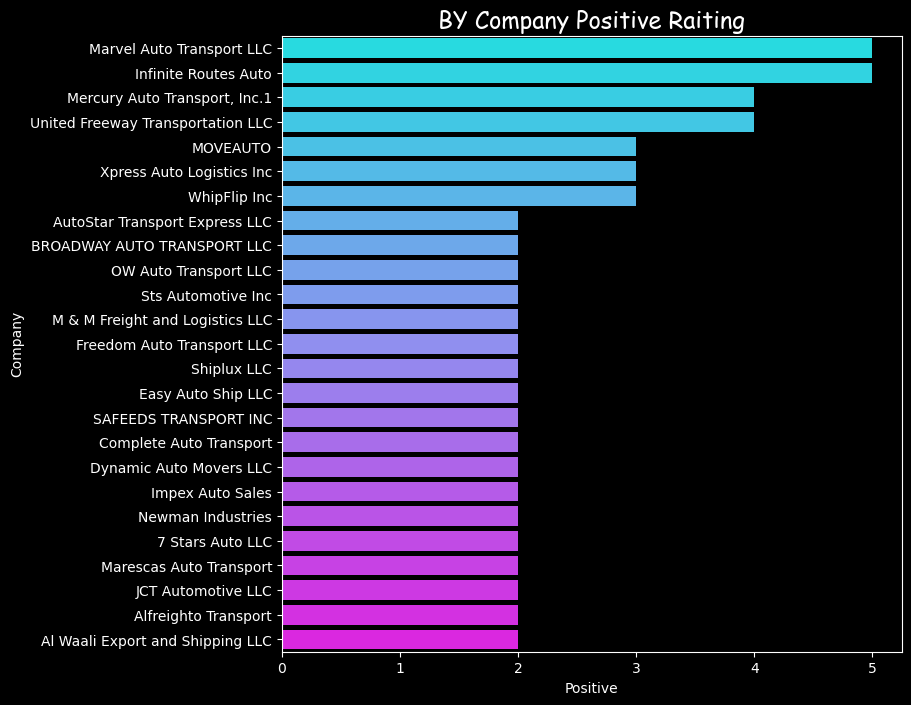

In [115]:
plt.figure(figsize=(8, 8))
sns.barplot(data = df_company.head(25),y = 'Company', x = 'Positive', palette='cool',orient ='h')
plt.title("BY Company Positive Raiting",fontdict={'fontsize': 17, 'fontname' : 'Comic Sans MS'});

# ბოლო სამი თვეში - თვის და კვირის საშუალო მაჩვენებელი

In [116]:
Av_m = df_month.query('Month >= "2023-06-01"')["Positive"].mean()
print("საშუალოდ მიღებული პოზიტივი თვის ჭრილში :", round(Av_m,1))

საშუალოდ მიღებული პოზიტივი თვის ჭრილში : 38.3


In [117]:
Av_m = df_week.query('Date >= "2023-06-01"')["Positive"].mean()
print("საშუალოდ მიღებული პოზიტივი კვირის ჭრილში :", round(Av_m,1))

საშუალოდ მიღებული პოზიტივი კვირის ჭრილში : 8.6


In [118]:
Av_n = df_month.query('Month >= "2023-06-01"')["Negative"].mean()
print("საშუალოდ მიღებული ნეგატივი თვის ჭრილში :", round(Av_n,1))

საშუალოდ მიღებული ნეგატივი თვის ჭრილში : 6.3


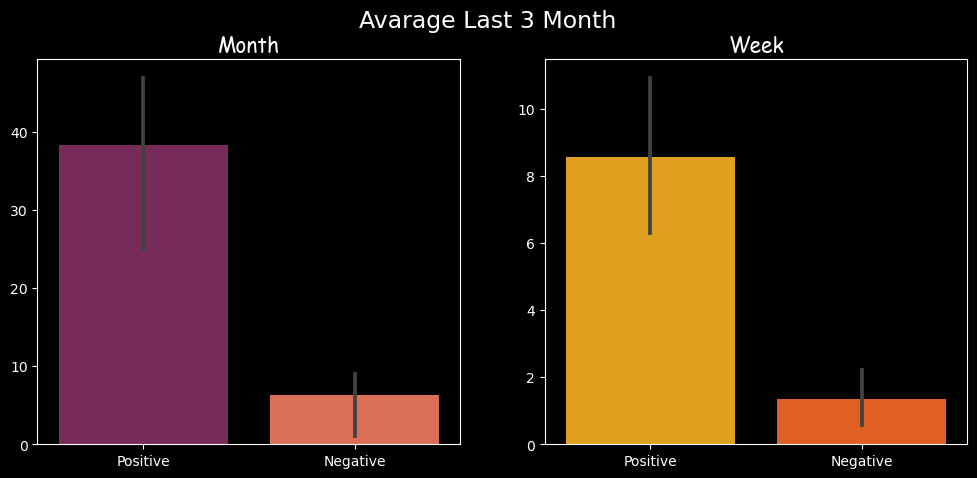

In [119]:
fig, axes = plt.subplots(1,2,figsize=(12,5))

fig.suptitle("Avarage Last 3 Month", size = 17)

sns.barplot(ax=axes[0], data = df_month.query('Month >= "2023-06-01"'), palette='rocket')
axes[0].set_title("Month",fontdict={'fontsize': 15, 'fontname' : 'Comic Sans MS'})

sns.barplot(data = df_week[["Date","Positive","Negative"]].query('Date >="2023-06-01"'),palette='autumn_r')
plt.title("Week", fontdict={'fontsize': 15, 'fontname' : 'Comic Sans MS'})

plt.show()